In [ ]:
import imutils
import cv2 as cs
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
 

rgbImg = cv2.imread('euro_coins.jpg') 
gray = cv2.imread('euro_coins.jpg', cv2.IMREAD_GRAYSCALE)
gray = cv2.GaussianBlur(gray, (5, 5), 0) # low pass filter b4 downsample
gray = cv2.resize(gray,(448,672)) # downsample by 10x
rgbImg = cv2.GaussianBlur(rgbImg, (5, 5), 0) # low pass filter b4 downsample
rgbImg = cv2.resize(rgbImg, (448,672)) # downsample by 10x
cv2_imshow(gray)

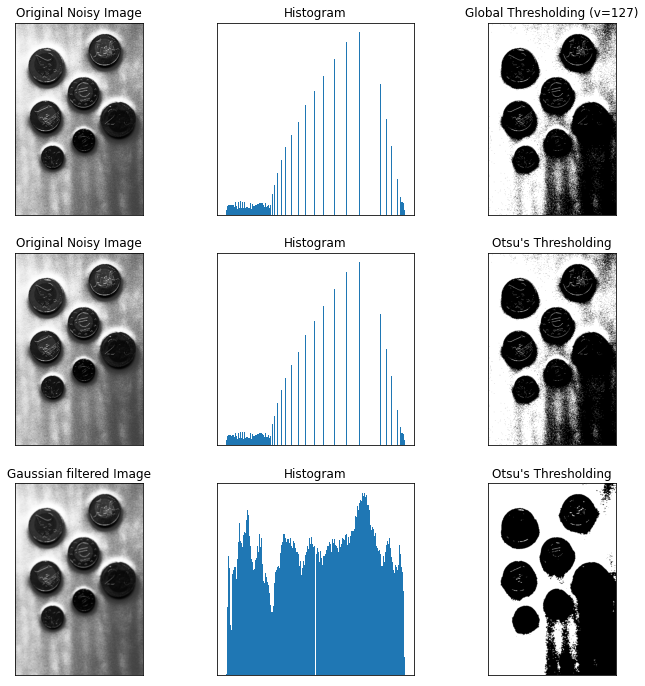

In [ ]:
plt.rcParams['figure.figsize']=(12,12)

# modify the image by trying a few things: 
# 1. Invert the image  img = cv2.bitwise_not(gray)
# 2. img = 255 - gray?
# 3. histeq?
# 4. clahe
# or any combination of these

img = cv2.equalizeHist(gray)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,128,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

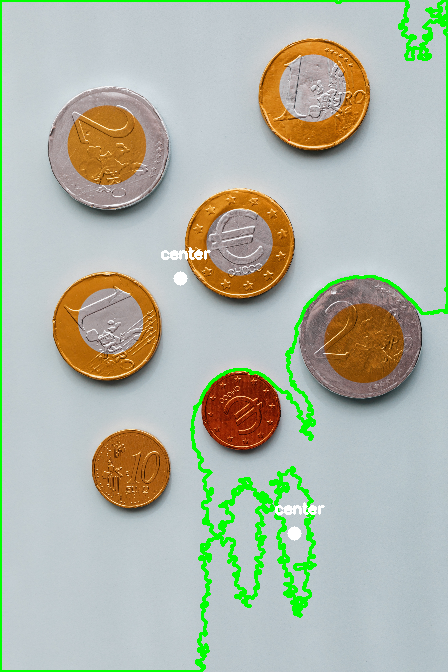

In [ ]:
cnts = cv2.findContours(th3.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

image = rgbImg.copy() # dummy image for drawing over contours

circles = []
for c in cnts:
  # compute the center of the contour
  M = cv2.moments(c)
  # todo: finetune the vertices count if neccessary and calculate the radius 
  # of each detected circle
  if c.shape[0] > 100: # more than 100 vertices = circle
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image, "center", (cX - 20, cY - 20),
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # todo: append the circle as a list: contour, center
    
# show the image
cv2_imshow(image)


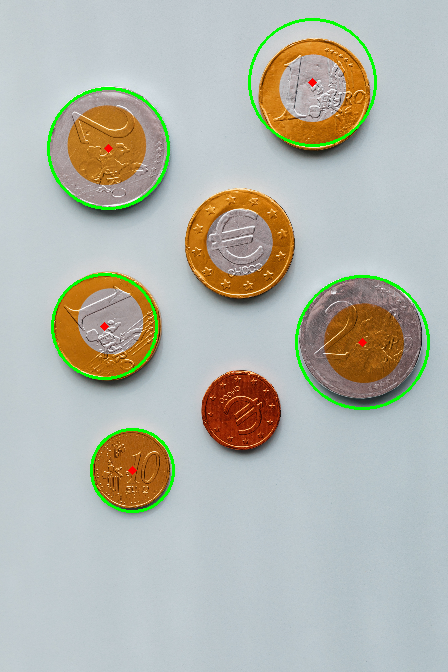

In [ ]:
circles = cv2.HoughCircles(
        blur, # source image (blurred and grayscaled)
        cv2.HOUGH_GRADIENT,  # type of detection
        1,  # inverse ratio of accumulator res. to image res.
        20,  # minimum distance between the centers of circles
        # param1=30,  # Gradient value passed to edge detection
        # param2=1,  # accumulator threshold for the circle centers
        # minRadius=min_r*2,  # min circle radius
        # maxRadius=max_r*2,  # max circle radius
    )
 
circles = np.uint16(np.around(circles))
cimg = rgbImg.copy()
for i in circles[0,:]:
    # draw the outer circle
  cimg = cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
  cimg = cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
 
cv2_imshow(cimg)